In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [220]:
df_man = pd.read_csv('modeling_data_all_man_4.csv', encoding='utf-8')

### 남성 군집 : 0~3

In [221]:
df_man = df_man[['성별', '연령대', '거주지분류대코드', '채널구분', '구매시간', '구매금액', '구매계절', '상품대분류명', '군집']]

In [222]:
df_woman = pd.read_csv('modeling_data.csv', encoding='utf-8')

### 여성 군집 : 4~9

In [223]:
df_woman = df_woman[['성별', '연령대', '거주지분류대코드', '채널구분', '구매시간', '구매금액', '구매계절', '상품대분류명', '군집']]

In [224]:
df_woman['군집'] = df_woman['군집'].map(lambda x:x+4)

In [225]:
df_man

,성별,연령대,거주지분류대코드,채널구분,구매시간,구매금액,구매계절,상품대분류명,군집
0,남성,50대,Z10,1번,14,69000,봄,스포츠패션,1
1,남성,30대,Z11,1번,17,4000,여름,주류,3
2,남성,70대,Z17,1번,14,11500,여름,컴퓨터,0
3,남성,50대,Z17,2번,1,22800,겨울,냉동식품,0
4,남성,20대,Z10,1번,15,6740,여름,테넌트/음식점,2
...,...,...,...,...,...,...,...,...,...
8427,남성,30대,Z17,1번,17,5600,겨울,테넌트/음식점,3
8428,남성,30대,Z04,1번,15,4500,봄,남성의류,1
8429,남성,50대,Z11,1번,14,79000,봄,모바일,1
8430,남성,40대,Z05,1번,14,4800,여름,과자,2


In [226]:
df_woman

,성별,연령대,거주지분류대코드,채널구분,구매시간,구매금액,구매계절,상품대분류명,군집
0,여성,40대,Z07,1번,17,4970,가을,조미료,6
1,여성,30대,Z11,1번,15,53500,겨울,여성의류,7
2,여성,50대,Z17,1번,12,1700,여름,조리식품,5
3,여성,40대,Z17,1번,17,5500,봄,과자,6
4,여성,40대,Z17,1번,15,46500,여름,테넌트/음식점,5
...,...,...,...,...,...,...,...,...,...
18480,여성,20대,Z10,1번,14,17400,가을,남성의류,9
18481,여성,40대,Z04,1번,18,7230,봄,담배,8
18482,여성,30대,Z16,1번,13,2300,여름,과자,4
18483,여성,20대,Z04,1번,16,7600,가을,기타(비상품),6


In [227]:
df = pd.concat([df_man, df_woman], axis = 0)

In [228]:
df.to_csv('modeling_data_all.csv', index=False)

In [229]:
# 성별 순서형으로 바꾸기
before = list(np.sort(df['성별'].unique()))
print(before)
after = [0,1]
print(after)
df['성별'].replace(before, after, inplace=True)

['남성', '여성']
[0, 1]


In [230]:
# 연령대 순서형으로 바꾸기
before = list(np.sort(df['연령대'].unique()))
print(before)
after = [2, 3, 4, 5, 6, 7]
print(after)
df['연령대'].replace(before, after, inplace=True)

['20대', '30대', '40대', '50대', '60대', '70대']
[2, 3, 4, 5, 6, 7]


In [231]:
# 거주지분류대코드 숫자형으로 바꾸기
before = list(np.sort(df['거주지분류대코드'].unique()))
print(before)
after = [i+1 for i in range(len(before))]
print(after)
df['거주지분류대코드'].replace(before, after, inplace=True)

['Z01', 'Z02', 'Z03', 'Z04', 'Z05', 'Z06', 'Z07', 'Z08', 'Z09', 'Z10', 'Z11', 'Z12', 'Z13', 'Z14', 'Z15', 'Z16', 'Z17']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


In [232]:
# 구매계절 숫자형으로 바꾸기
before = list(np.sort(df['구매계절'].unique()))
print(before)
after = [0,1,2,3]
print(after)
df['구매계절'].replace(before, after, inplace=True)

['가을', '겨울', '봄', '여름']
[0, 1, 2, 3]


In [233]:
# 상품대분류 숫자형으로
before = list(np.sort(df['상품대분류명'].unique()))
print(before)
after = [i for i in range(len(before))]
print(after)
df['상품대분류명'].replace(before, after, inplace=True)

['가구', '건강식품', '건강용품', '건해산물', '계절가전', '공구/안전용품', '과일', '과자', '구기/필드스포츠', '기타(비상품)', '남성의류', '냉동식품', '냉장/세탁가전', '냉장식품', '담배', '대용식', '모바일', '문구/사무용품', '병통조림', '상품권', '생활/렌탈서비스', '생활/주방가전', '서적/음반/악기', '세제/위생', '속옷/양말/홈웨어', '수산물', '스포츠패션', '시즌스포츠', '식기/조리기구', '아웃도어/레저', '양곡', '여성의류', '여행/레저서비스', '영상/음향가전', '완구', '원예/애완', '유아동의류', '유아식품', '유제품', '음료', '인테리어/조명', '자동차용품', '조리식품', '조미료', '주류', '주방잡화', '채소', '청소/세탁/욕실용품', '축산물', '출산/육아용품', '침구/수예', '커피/차', '컴퓨터', '테넌트/음식점', '패션잡화', '퍼스널케어', '헬스/피트니스', '화장품/뷰티케어']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57]


In [234]:
# 채널구분 숫자형으로
before = list(np.sort(df['채널구분'].unique()))
print(before)
after = [i+1 for i in range(len(before))]
print(after)
df['채널구분'].replace(before, after, inplace=True)

['1번', '2번']
[1, 2]


In [235]:
df

,성별,연령대,거주지분류대코드,채널구분,구매시간,구매금액,구매계절,상품대분류명,군집
0,0,5,10,1,14,69000,2,26,1
1,0,3,11,1,17,4000,3,44,3
2,0,7,17,1,14,11500,3,52,0
3,0,5,17,2,1,22800,1,11,0
4,0,2,10,1,15,6740,3,53,2
...,...,...,...,...,...,...,...,...,...
18480,1,2,10,1,14,17400,0,10,9
18481,1,4,4,1,18,7230,2,14,8
18482,1,3,16,1,13,2300,3,7,4
18483,1,2,4,1,16,7600,0,9,6


In [236]:
# # 연속변수 스케일링 -> 안해도 정확도 똑같음
# from sklearn.preprocessing import MinMaxScaler
# scaled_X = MinMaxScaler().fit_transform(df[['구매시간', '구매금액', '구매수량']])
# df[['구매시간', '구매금액', '구매수량']] = scaled_X

In [237]:
# X 변수 설정 - 모델 만들때는 고객번호 빼기
x_cols = ['구매시간', '구매금액', '성별', '연령대', '거주지분류대코드', '채널구분', '구매계절', '상품대분류명']
X = df[x_cols].values
X

array([[   14, 69000,     0, ...,     1,     2,    26],
       [   17,  4000,     0, ...,     1,     3,    44],
       [   14, 11500,     0, ...,     1,     3,    52],
       ...,
       [   13,  2300,     1, ...,     1,     3,     7],
       [   16,  7600,     1, ...,     1,     0,     9],
       [   16,  5960,     1, ...,     1,     3,    11]], dtype=int64)

In [238]:
# Y 설정
y = df['군집'].values
y

array([1, 3, 0, ..., 4, 6, 5], dtype=int64)

In [239]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [240]:
from sklearn.ensemble import ExtraTreesClassifier

train_acc =[]
test_acc = []
n = range(3,21)

for i in tqdm(n): 
        extra_tree = ExtraTreesClassifier(max_depth=i,  n_estimators=100, random_state=42)
        extra_tree.fit(X_train, y_train)
        train_acc.append(extra_tree.score(X_train, y_train))
        test_acc.append(extra_tree.score(X_test, y_test))

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [01:14<00:00,  4.12s/it]


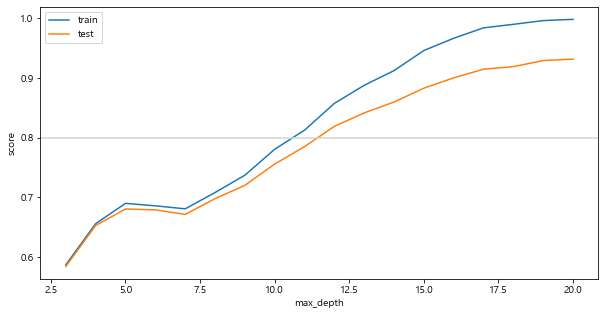

In [332]:
plt.figure(figsize=(10,5))
plt.plot(n, train_acc, label='train')
plt.plot(n, test_acc, label='test')
plt.axhline(0.8, color='lightgray')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.legend()
plt.show()

- 6 아니면 7

In [243]:
extra_tree = ExtraTreesClassifier(max_depth=13, n_estimators = 100, random_state=42) 
extra_tree.fit(X_train, y_train)
print("훈련 점수 : ", extra_tree.score(X_train, y_train))
print("테스트 점수 : ", extra_tree.score(X_test, y_test))

훈련 점수 :  0.8875679190080342
테스트 점수 :  0.8413818722139673


In [244]:
# 예측 수행
pred_rf = extra_tree.predict(X_test)
print(pred_rf)

[7 5 3 ... 8 7 3]


In [245]:
# 혼동 행렬 확인
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, pred_rf)
print(conf_matrix)

[[336  24  13  34   0   0   0   0   0   0]
 [ 21 380  18  19   0   0   0   0   0   0]
 [ 32  37 326  15   0   0   0   0   0   0]
 [ 10  29  23 392   0   0   0   0   0   0]
 [  0   0   0   0 166   4   2  17  23   2]
 [  0   0   0   0   3 625  10  24  50   0]
 [  0   0   0   0   5  16 404  26  81  23]
 [  0   0   0   0  12  37   9 647  34  12]
 [  0   0   0   0  13  16  11  12 870  21]
 [  0   0   0   0   2  26   9  51  28 384]]


In [289]:
# 분류 리포트 확인
from sklearn.metrics import classification_report
class_report = classification_report(y_test, pred_rf)
print(class_report)

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       407
           1       0.81      0.87      0.84       438
           2       0.86      0.80      0.83       410
           3       0.85      0.86      0.86       454
           4       0.83      0.78      0.80       214
           5       0.86      0.88      0.87       712
           6       0.91      0.73      0.81       555
           7       0.83      0.86      0.85       751
           8       0.80      0.92      0.86       943
           9       0.87      0.77      0.82       500

    accuracy                           0.84      5384
   macro avg       0.85      0.83      0.84      5384
weighted avg       0.84      0.84      0.84      5384



In [327]:
x_columns = ['구매금액', '채널구분', '상품대분류명', '구매시간', '거주지분류대코드', '연령대', '성별', 
            '구매계절']

In [328]:
def plot_importances(model):
    n = 8
    plt.barh(np.arange(n), sorted(model.feature_importances_), align='center')
    plt.yticks(np.arange(n), x_columns)
    plt.xlabel('importance')
    plt.ylabel('feature')
    plt.ylim(-1, n)

In [329]:
extra_tree.feature_importances_

array([0.06411343, 0.01880479, 0.25198716, 0.1818116 , 0.11922404,
       0.03036504, 0.29646264, 0.0372313 ])

In [330]:
plt.rcParams['font.family'] = 'Malgun Gothic'

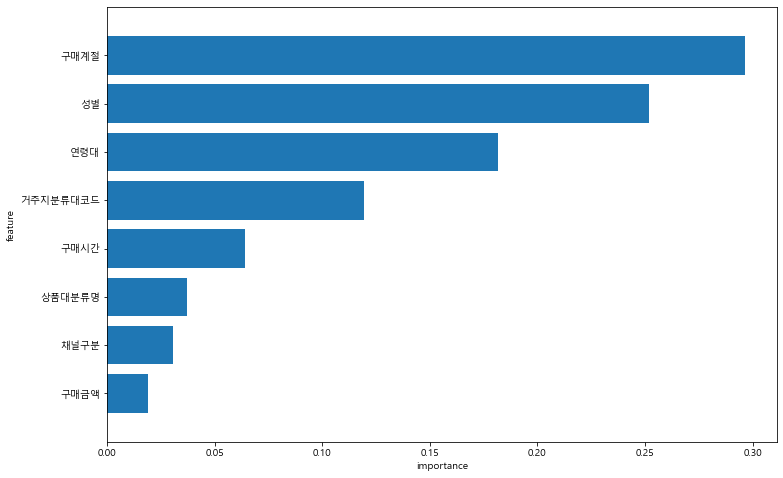

In [331]:
# feature_importance
extra_tree.feature_importances_
plt.figure(figsize=(12,8))
plot_importances(extra_tree)

In [251]:
lpay_man = pd.read_csv('lpay_by_cust_man.csv', encoding='utf-8')

In [252]:
lpay_woman = pd.read_csv('lpay_by_cust_woman.csv', encoding='utf-8')

In [253]:
lpay = pd.concat([lpay_man, lpay_woman], axis=0)

In [254]:
lpay.to_csv('lpay_by_cust_all.csv', index=False)

In [255]:
lpay.head()

,고객번호,성별,연령대,거주지분류대코드,채널구분,제휴사,구매시간,구매금액,구매계절,상품대분류명
0,M000557840,남성,30대,Z11,1번,A02,17,39565,여름,축산물
1,M001403108,남성,20대,Z10,1번,A01,15,9890,가을,냉동식품
2,M001444118,남성,30대,Z17,2번,A06,17,16871,봄,축산물
3,M001697471,남성,40대,Z17,1번,A02,16,51850,여름,수산물
4,M001808316,남성,30대,Z17,1번,A01,14,11760,봄,냉동식품


In [256]:
# 거주지 숫자형으로 바꾸기
before = list(np.sort(lpay['성별'].unique()))
print(before)
after = [i for i in range(len(before))]
print(after)
lpay['성별'].replace(before, after, inplace=True)

['남성', '여성']
[0, 1]


In [257]:
# 거주지 숫자형으로 바꾸기
before = list(np.sort(lpay['연령대'].unique()))
print(before)
after = [i+2 for i in range(len(before))]
print(after)
lpay['연령대'].replace(before, after, inplace=True)

['20대', '30대', '40대', '50대', '60대', '70대']
[2, 3, 4, 5, 6, 7]


In [258]:
# 거주지 숫자형으로 바꾸기
before = list(np.sort(lpay['거주지분류대코드'].unique()))
print(before)
after = [i+1 for i in range(len(before))]
print(after)
lpay['거주지분류대코드'].replace(before, after, inplace=True)

['Z01', 'Z02', 'Z03', 'Z04', 'Z05', 'Z06', 'Z07', 'Z08', 'Z09', 'Z10', 'Z11', 'Z12', 'Z13', 'Z14', 'Z15', 'Z16', 'Z17']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


In [259]:
# 채널 숫자형으로 바꾸기
before = list(np.sort(lpay['채널구분'].unique()))
print(before)
after = [i+1 for i in range(len(before))]
print(after)
lpay['채널구분'].replace(before, after, inplace=True)

['1번', '2번']
[1, 2]


In [260]:
# 구매월 숫자형으로 바꾸기
before = list(np.sort(lpay['구매계절'].unique()))
print(before)
after = [i for i in range(len(before))]
print(after)
lpay['구매계절'].replace(before, after, inplace=True)

['가을', '겨울', '봄', '여름']
[0, 1, 2, 3]


In [261]:
# 상품대분류 숫자형으로
before = list(np.sort(lpay['상품대분류명'].unique()))
print(before)
after = [i for i in range(len(before))]
print(after)
lpay['상품대분류명'].replace(before, after, inplace=True)

['가구', '건강식품', '건강용품', '건해산물', '계절가전', '공구/안전용품', '과일', '과자', '구기/필드스포츠', '금융/보험서비스', '기타(비상품)', '기타상품', '남성의류', '냉동식품', '냉장/세탁가전', '냉장식품', '담배', '대용식', '모바일', '문구/사무용품', '병통조림', '상품권', '생활/렌탈서비스', '생활/주방가전', '서적/음반/악기', '세제/위생', '속옷/양말/홈웨어', '수산물', '스포츠패션', '시즌스포츠', '식기/조리기구', '아웃도어/레저', '양곡', '여성의류', '여행/레저서비스', '영상/음향가전', '완구', '원예/애완', '유아동의류', '유아식품', '유제품', '음료', '인테리어/조명', '자동차용품', '조리식품', '조미료', '주류', '주방잡화', '채소', '청소/세탁/욕실용품', '축산물', '출산/육아용품', '침구/수예', '커피/차', '컴퓨터', '테넌트/음식점', '패션잡화', '퍼스널케어', '헬스/피트니스', '화장품/뷰티케어']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]


In [262]:
nlpay = lpay[['구매시간', '구매금액', '성별', '연령대', '거주지분류대코드', '채널구분', '구매계절', '상품대분류명']]

In [263]:
nlpay

,구매시간,구매금액,성별,연령대,거주지분류대코드,채널구분,구매계절,상품대분류명
0,17,39565,0,3,11,1,3,50
1,15,9890,0,2,10,1,0,13
2,17,16871,0,3,17,2,2,50
3,16,51850,0,4,17,1,3,27
4,14,11760,0,3,17,1,2,13
...,...,...,...,...,...,...,...,...
5896,16,234100,1,4,17,2,0,15
5897,12,11705,1,3,10,2,2,21
5898,14,31830,1,4,4,2,2,16
5899,11,4900,1,3,16,1,3,7


In [264]:
from tqdm import tqdm

In [265]:
list(nlpay.iloc[0])

[17, 39565, 0, 3, 11, 1, 3, 50]

In [266]:
# 예측 수행
cluster = []
for i in tqdm(range(len(nlpay['연령대']))):
    x = list(nlpay.iloc[i])
    cluster.append(extra_tree.predict([x])[0])

100%|██████████████████████████████████████████████████████████████████████████████| 8906/8906 [01:36<00:00, 91.95it/s]


In [184]:
lpay = pd.read_csv('lpay_by_cust_all.csv', encoding='utf-8')

In [185]:
lpay['군집'] = cluster

In [186]:
lpay

,고객번호,성별,연령대,거주지분류대코드,채널구분,제휴사,구매시간,구매금액,구매계절,상품대분류명,군집
0,M000557840,남성,30대,Z11,1번,A02,17,39565,여름,축산물,0
1,M001403108,남성,20대,Z10,1번,A01,15,9890,가을,냉동식품,0
2,M001444118,남성,30대,Z17,2번,A06,17,16871,봄,축산물,4
3,M001697471,남성,40대,Z17,1번,A02,16,51850,여름,수산물,2
4,M001808316,남성,30대,Z17,1번,A01,14,11760,봄,냉동식품,4
...,...,...,...,...,...,...,...,...,...,...,...
8901,M999227380,여성,40대,Z17,2번,E01,16,234100,가을,냉장식품,7
8902,M999268192,여성,30대,Z10,2번,L01,12,11705,봄,상품권,10
8903,M999599111,여성,40대,Z04,2번,L01,14,31830,봄,담배,5
8904,M999770689,여성,30대,Z16,1번,A04,11,4900,여름,과자,10


- lpay 이용 고객은 온라인으로 많이 구매
- 같은 고객번호라도 lpay로 구매한 내역은 달라지므로 군집이 달라짐
- 고객번호가 같은 경우, 전체 구매 데이터에서 많이 구매한 상품 정보를 넣었고, 전체 구매 데이터에 없는 고객은 랜덤으로 집어넣음
- lpay 앱 이용 시작 전, 어떤 상품에 관심이 많은지 선택하라고 하고 추천. -> 지금은 랜덤으로 집어넣음

In [187]:
# 카테고리컬 변수들의 최빈값 확인
lpay[['성별', '연령대', '거주지분류대코드', '채널구분', '구매계절', '상품대분류명', '군집']].groupby('군집').agg([pd.Series.mode]).T

,군집,0,1,2,3,4,5,6,7,8,9,10
성별,mode,남성,남성,남성,남성,남성,여성,여성,여성,여성,여성,여성
연령대,mode,30대,50대,40대,40대,20대,40대,50대,40대,30대,40대,30대
거주지분류대코드,mode,Z10,Z10,Z17,Z10,Z17,Z10,Z10,Z17,Z17,Z10,Z10
채널구분,mode,2번,2번,2번,2번,2번,2번,1번,1번,1번,2번,2번
구매계절,mode,"[가을, 여름]",겨울,여름,겨울,봄,겨울,여름,가을,겨울,봄,가을
상품대분류명,mode,"[기타상품, 냉장식품]",생활/렌탈서비스,아웃도어/레저,과자,헬스/피트니스,과자,테넌트/음식점,과자,테넌트/음식점,유제품,테넌트/음식점


In [188]:
# 숫자형 변수들의 평균값 및 중앙값 확인
lpay[['구매시간', '구매금액', '군집']].groupby('군집').agg(['mean', 'median']).T

군집                     0             1             2              3   \
구매시간 mean       13.659472     14.368932     15.313235      14.634036   
     median     14.000000     15.000000     15.000000      15.000000   
구매금액 mean    84595.166667  91191.521036  77677.658824  104246.115964   
     median  21835.000000  26000.000000  23305.000000   24642.000000   

군집                     4             5              6             7   \
구매시간 mean       15.119691     13.343708      15.047714     15.098662   
     median     15.500000     14.000000      15.000000     15.000000   
구매금액 mean    90549.123552  54227.758232  235538.001988  84090.212375   
     median  22045.000000  31910.000000   24252.000000  27280.000000   

군집                     8              9             10  
구매시간 mean       15.628806      15.831897     14.037453  
     median     16.000000      16.000000     14.000000  
구매금액 mean    73985.103044  123975.945043  93628.024969  
     median  22865.000000   28450.000000  25975.000000

In [189]:
# 군집별 고객 수
lpay[['고객번호', '군집']].groupby('군집').agg(['count']).T

,군집,0,1,2,3,4,5,6,7,8,9,10
고객번호,count,834,309,680,664,518,2217,503,598,854,928,801


In [190]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [194]:
cluster_0 = lpay[lpay['군집'] == 0]
cluster_1 = lpay[lpay['군집'] == 1]
cluster_2 = lpay[lpay['군집'] == 2]
cluster_3 = lpay[lpay['군집'] == 3]
cluster_4 = lpay[lpay['군집'] == 4]
cluster_5 = lpay[lpay['군집'] == 5]
cluster_6 = lpay[lpay['군집'] == 6]
cluster_7 = lpay[lpay['군집'] == 7]
cluster_8 = lpay[lpay['군집'] == 8]
cluster_9 = lpay[lpay['군집'] == 9]
cluster_10 = lpay[lpay['군집'] == 10]

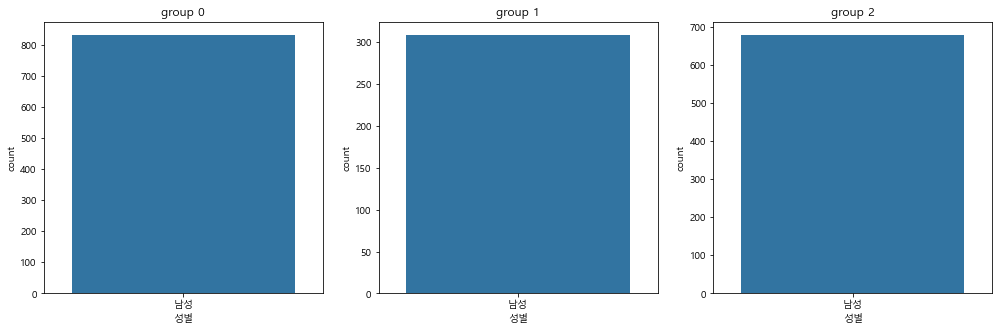

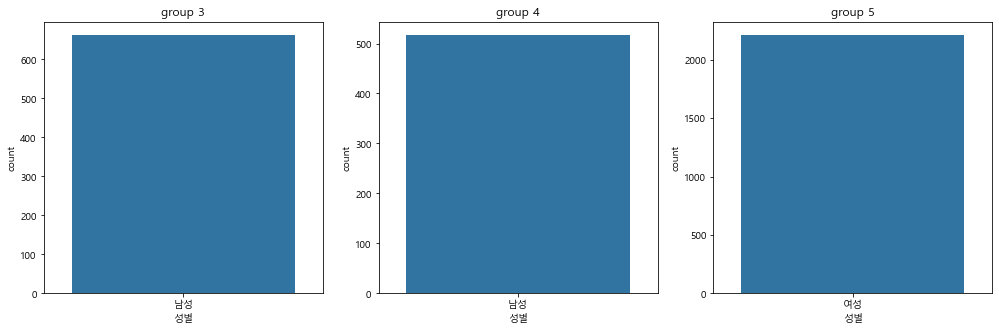

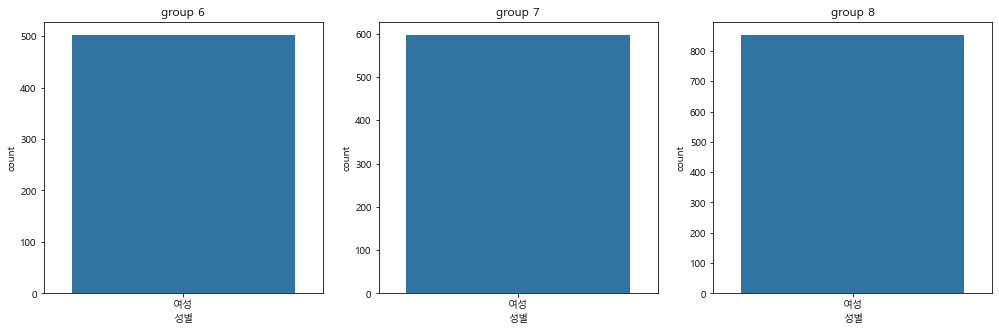

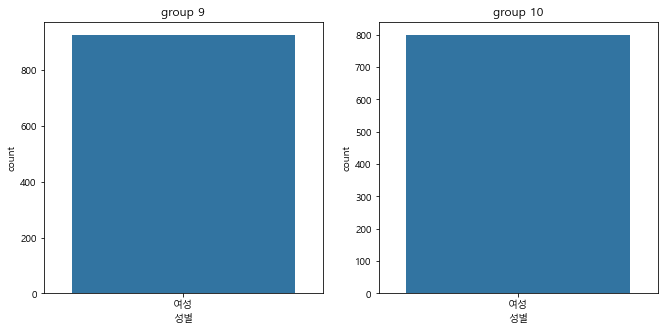

In [197]:
# 성별
plt.figure(figsize=(17,5))
plt.subplot(131)
a=sns.countplot(x='성별', data=cluster_0, order = cluster_0['성별'].value_counts().index)
a.set(title = "group 0")
plt.subplot(132)
b=sns.countplot(x='성별', data=cluster_1, order = cluster_1['성별'].value_counts().index)
b.set(title = "group 1")
plt.subplot(133)
c=sns.countplot(x='성별', data=cluster_2, order = cluster_2['성별'].value_counts().index)
c.set(title = "group 2")
plt.show()

plt.figure(figsize=(17,5))
plt.subplot(131)
a=sns.countplot(x='성별', data=cluster_3, order = cluster_3['성별'].value_counts().index)
a.set(title = "group 3")
plt.subplot(132)
b=sns.countplot(x='성별', data=cluster_4, order = cluster_4['성별'].value_counts().index)
b.set(title = "group 4")
plt.subplot(133)
c=sns.countplot(x='성별', data=cluster_5, order = cluster_5['성별'].value_counts().index)
c.set(title = "group 5")
plt.show()

plt.figure(figsize=(17,5))
plt.subplot(131)
a=sns.countplot(x='성별', data=cluster_6, order = cluster_6['성별'].value_counts().index)
a.set(title = "group 6")
plt.subplot(132)
b=sns.countplot(x='성별', data=cluster_7, order = cluster_7['성별'].value_counts().index)
b.set(title = "group 7")
plt.subplot(133)
c=sns.countplot(x='성별', data=cluster_8, order = cluster_8['성별'].value_counts().index)
c.set(title = "group 8")
plt.show()

plt.figure(figsize=(17,5))
plt.subplot(131)
a=sns.countplot(x='성별', data=cluster_9, order = cluster_9['성별'].value_counts().index)
a.set(title = "group 9")
plt.subplot(132)
b=sns.countplot(x='성별', data=cluster_10, order = cluster_10['성별'].value_counts().index)
b.set(title = "group 10")
plt.show()

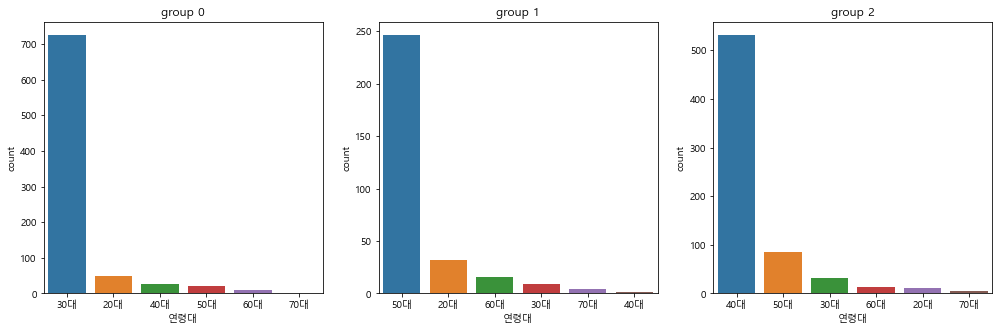

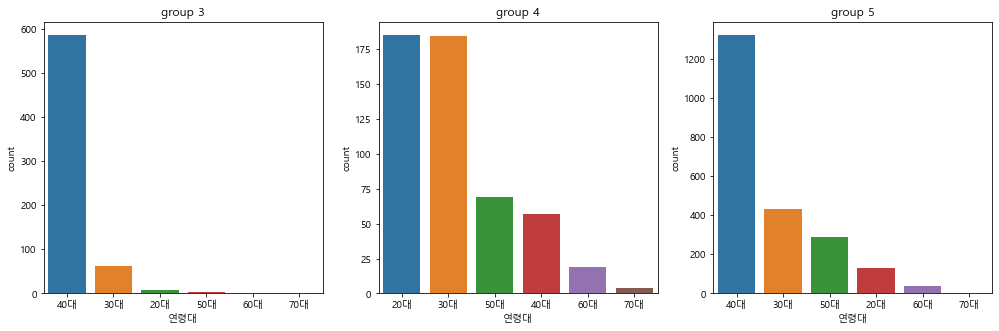

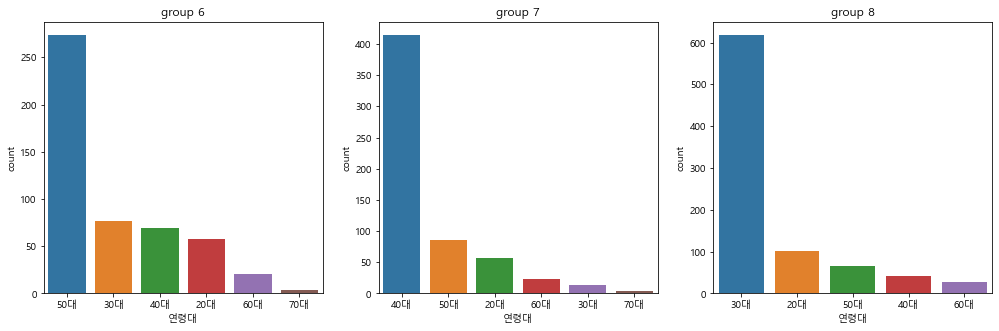

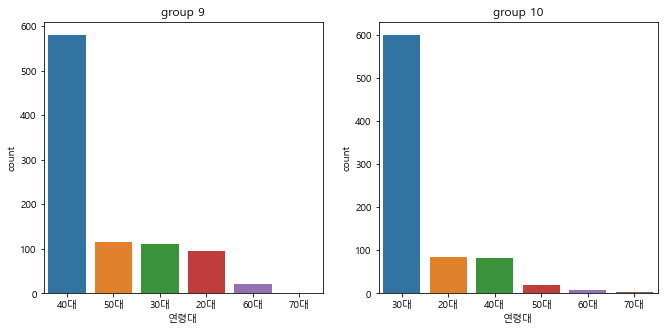

In [196]:
# 연령대
plt.figure(figsize=(17,5))
plt.subplot(131)
a=sns.countplot(x='연령대', data=cluster_0, order = cluster_0['연령대'].value_counts().index)
a.set(title = "group 0")
plt.subplot(132)
b=sns.countplot(x='연령대', data=cluster_1, order = cluster_1['연령대'].value_counts().index)
b.set(title = "group 1")
plt.subplot(133)
c=sns.countplot(x='연령대', data=cluster_2, order = cluster_2['연령대'].value_counts().index)
c.set(title = "group 2")
plt.show()

plt.figure(figsize=(17,5))
plt.subplot(131)
a=sns.countplot(x='연령대', data=cluster_3, order = cluster_3['연령대'].value_counts().index)
a.set(title = "group 3")
plt.subplot(132)
b=sns.countplot(x='연령대', data=cluster_4, order = cluster_4['연령대'].value_counts().index)
b.set(title = "group 4")
plt.subplot(133)
c=sns.countplot(x='연령대', data=cluster_5, order = cluster_5['연령대'].value_counts().index)
c.set(title = "group 5")
plt.show()

plt.figure(figsize=(17,5))
plt.subplot(131)
a=sns.countplot(x='연령대', data=cluster_6, order = cluster_6['연령대'].value_counts().index)
a.set(title = "group 6")
plt.subplot(132)
b=sns.countplot(x='연령대', data=cluster_7, order = cluster_7['연령대'].value_counts().index)
b.set(title = "group 7")
plt.subplot(133)
c=sns.countplot(x='연령대', data=cluster_8, order = cluster_8['연령대'].value_counts().index)
c.set(title = "group 8")
plt.show()

plt.figure(figsize=(17,5))
plt.subplot(131)
a=sns.countplot(x='연령대', data=cluster_9, order = cluster_9['연령대'].value_counts().index)
a.set(title = "group 9")
plt.subplot(132)
b=sns.countplot(x='연령대', data=cluster_10, order = cluster_10['연령대'].value_counts().index)
b.set(title = "group 10")
plt.show()

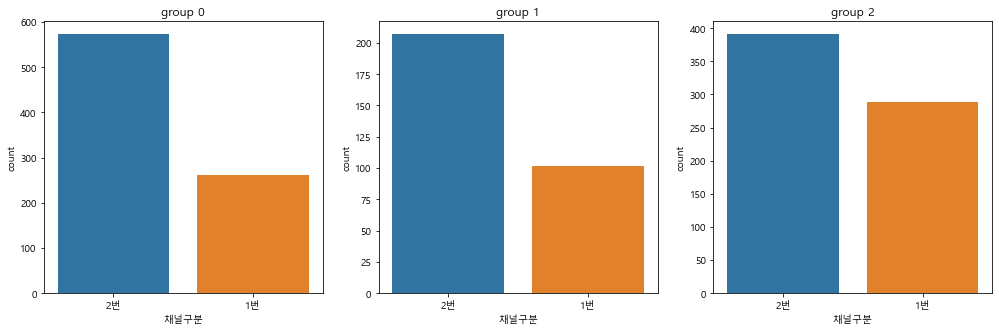

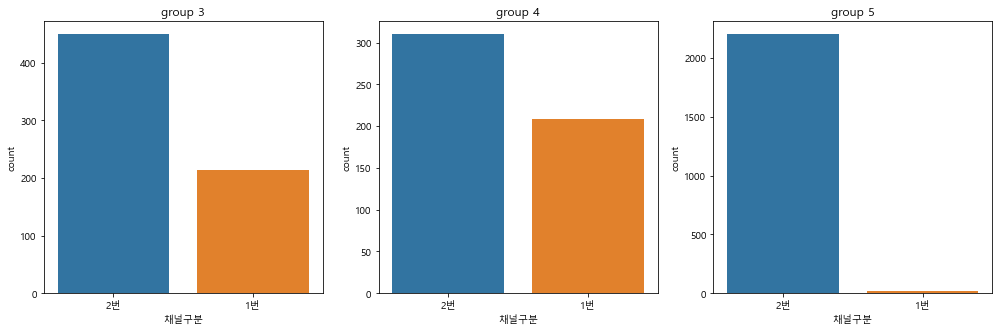

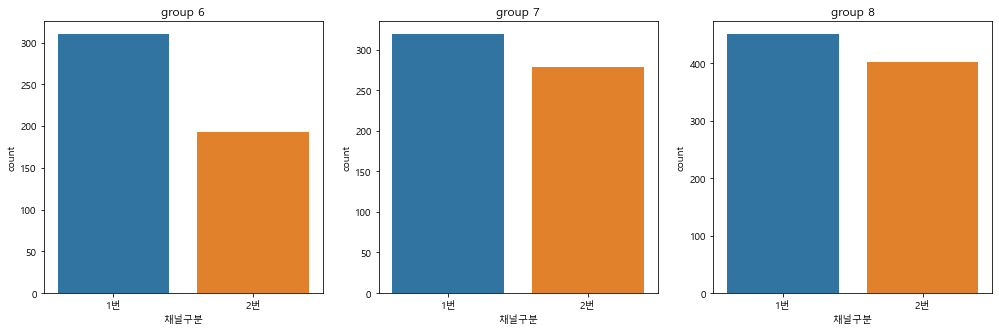

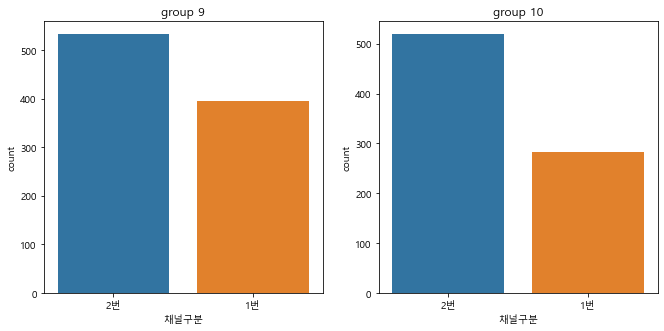

In [198]:
# 연령대
plt.figure(figsize=(17,5))
plt.subplot(131)
a=sns.countplot(x='채널구분', data=cluster_0, order = cluster_0['채널구분'].value_counts().index)
a.set(title = "group 0")
plt.subplot(132)
b=sns.countplot(x='채널구분', data=cluster_1, order = cluster_1['채널구분'].value_counts().index)
b.set(title = "group 1")
plt.subplot(133)
c=sns.countplot(x='채널구분', data=cluster_2, order = cluster_2['채널구분'].value_counts().index)
c.set(title = "group 2")
plt.show()

plt.figure(figsize=(17,5))
plt.subplot(131)
a=sns.countplot(x='채널구분', data=cluster_3, order = cluster_3['채널구분'].value_counts().index)
a.set(title = "group 3")
plt.subplot(132)
b=sns.countplot(x='채널구분', data=cluster_4, order = cluster_4['채널구분'].value_counts().index)
b.set(title = "group 4")
plt.subplot(133)
c=sns.countplot(x='채널구분', data=cluster_5, order = cluster_5['채널구분'].value_counts().index)
c.set(title = "group 5")
plt.show()

plt.figure(figsize=(17,5))
plt.subplot(131)
a=sns.countplot(x='채널구분', data=cluster_6, order = cluster_6['채널구분'].value_counts().index)
a.set(title = "group 6")
plt.subplot(132)
b=sns.countplot(x='채널구분', data=cluster_7, order = cluster_7['채널구분'].value_counts().index)
b.set(title = "group 7")
plt.subplot(133)
c=sns.countplot(x='채널구분', data=cluster_8, order = cluster_8['채널구분'].value_counts().index)
c.set(title = "group 8")
plt.show()

plt.figure(figsize=(17,5))
plt.subplot(131)
a=sns.countplot(x='채널구분', data=cluster_9, order = cluster_9['채널구분'].value_counts().index)
a.set(title = "group 9")
plt.subplot(132)
b=sns.countplot(x='채널구분', data=cluster_10, order = cluster_10['채널구분'].value_counts().index)
b.set(title = "group 10")
plt.show()

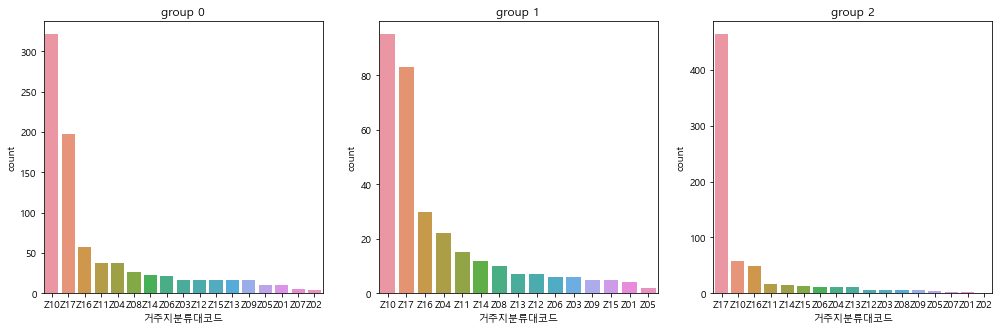

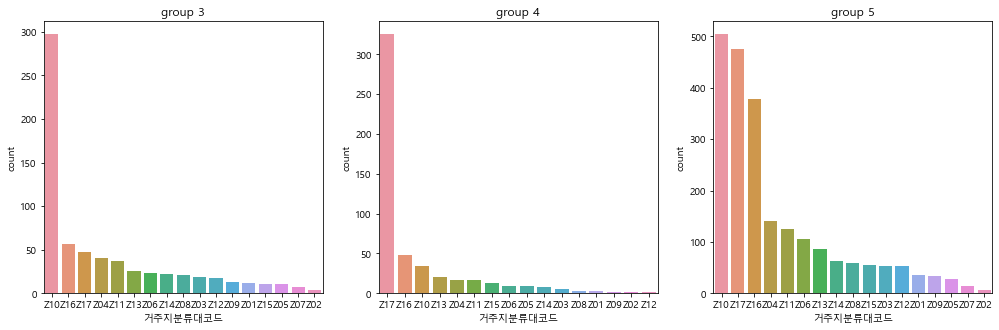

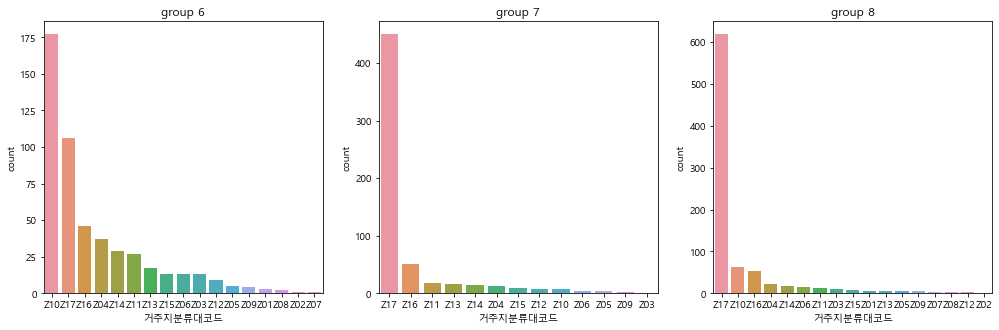

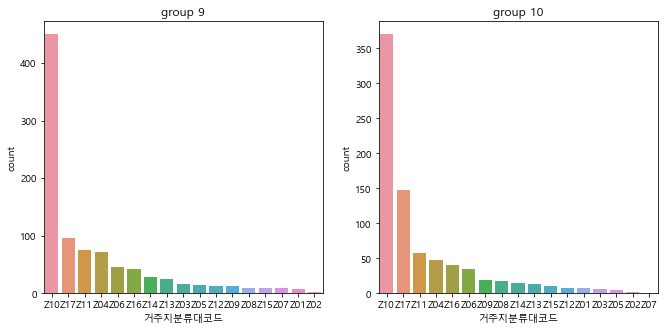

In [199]:
# 연령대
plt.figure(figsize=(17,5))
plt.subplot(131)
a=sns.countplot(x='거주지분류대코드', data=cluster_0, order = cluster_0['거주지분류대코드'].value_counts().index)
a.set(title = "group 0")
plt.subplot(132)
b=sns.countplot(x='거주지분류대코드', data=cluster_1, order = cluster_1['거주지분류대코드'].value_counts().index)
b.set(title = "group 1")
plt.subplot(133)
c=sns.countplot(x='거주지분류대코드', data=cluster_2, order = cluster_2['거주지분류대코드'].value_counts().index)
c.set(title = "group 2")
plt.show()

plt.figure(figsize=(17,5))
plt.subplot(131)
a=sns.countplot(x='거주지분류대코드', data=cluster_3, order = cluster_3['거주지분류대코드'].value_counts().index)
a.set(title = "group 3")
plt.subplot(132)
b=sns.countplot(x='거주지분류대코드', data=cluster_4, order = cluster_4['거주지분류대코드'].value_counts().index)
b.set(title = "group 4")
plt.subplot(133)
c=sns.countplot(x='거주지분류대코드', data=cluster_5, order = cluster_5['거주지분류대코드'].value_counts().index)
c.set(title = "group 5")
plt.show()

plt.figure(figsize=(17,5))
plt.subplot(131)
a=sns.countplot(x='거주지분류대코드', data=cluster_6, order = cluster_6['거주지분류대코드'].value_counts().index)
a.set(title = "group 6")
plt.subplot(132)
b=sns.countplot(x='거주지분류대코드', data=cluster_7, order = cluster_7['거주지분류대코드'].value_counts().index)
b.set(title = "group 7")
plt.subplot(133)
c=sns.countplot(x='거주지분류대코드', data=cluster_8, order = cluster_8['거주지분류대코드'].value_counts().index)
c.set(title = "group 8")
plt.show()

plt.figure(figsize=(17,5))
plt.subplot(131)
a=sns.countplot(x='거주지분류대코드', data=cluster_9, order = cluster_9['거주지분류대코드'].value_counts().index)
a.set(title = "group 9")
plt.subplot(132)
b=sns.countplot(x='거주지분류대코드', data=cluster_10, order = cluster_10['거주지분류대코드'].value_counts().index)
b.set(title = "group 10")
plt.show()

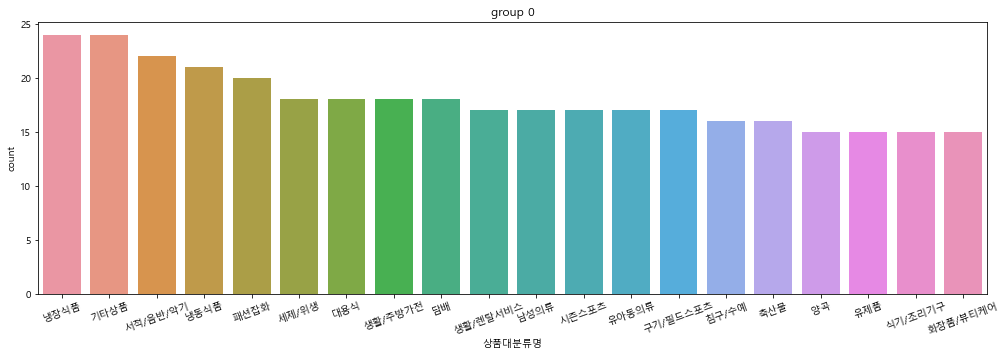

In [200]:
# 상품대분류명
plt.figure(figsize=(17,5))
a=sns.countplot(x='상품대분류명', data=cluster_0, order = cluster_0['상품대분류명'].value_counts().index[:20])
a.set_xticklabels(a.get_xticklabels(),rotation = 20)
a.set(title = "group 0")
plt.show()

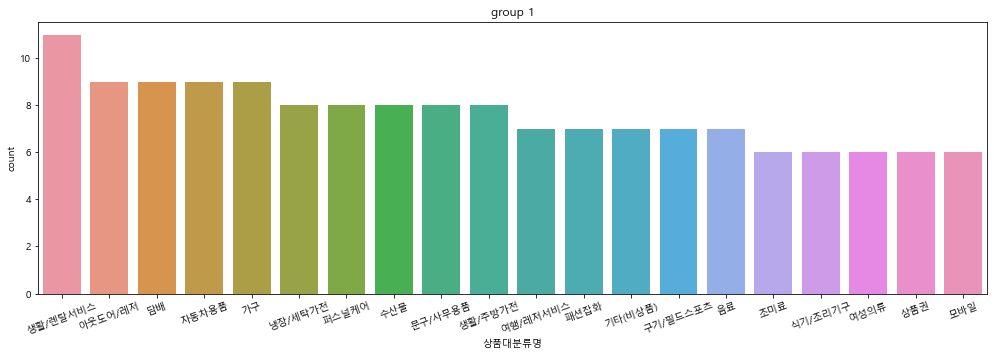

In [201]:
plt.figure(figsize=(17,5))
a=sns.countplot(x='상품대분류명', data=cluster_1, order = cluster_1['상품대분류명'].value_counts().index[:20])
a.set_xticklabels(a.get_xticklabels(),rotation = 20)
a.set(title = "group 1")
plt.show()

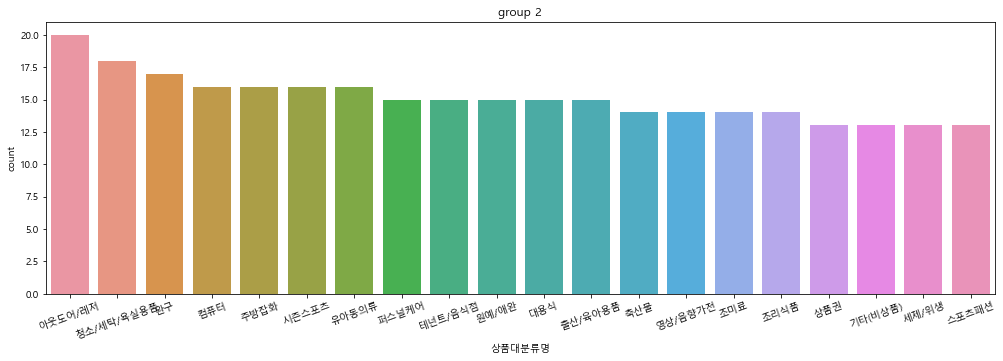

In [202]:
plt.figure(figsize=(17,5))
a=sns.countplot(x='상품대분류명', data=cluster_2, order = cluster_2['상품대분류명'].value_counts().index[:20])
a.set_xticklabels(a.get_xticklabels(),rotation = 20)
a.set(title = "group 2")
plt.show()

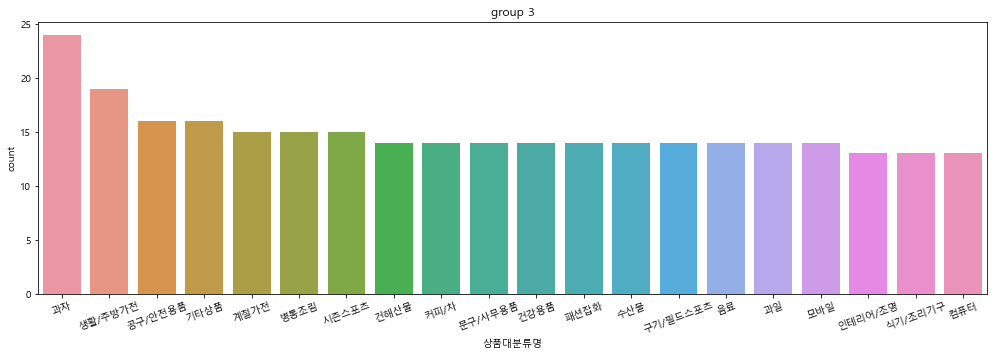

In [203]:
plt.figure(figsize=(17,5))
a=sns.countplot(x='상품대분류명', data=cluster_3, order = cluster_3['상품대분류명'].value_counts().index[:20])
a.set_xticklabels(a.get_xticklabels(),rotation = 20)
a.set(title = "group 3")
plt.show()

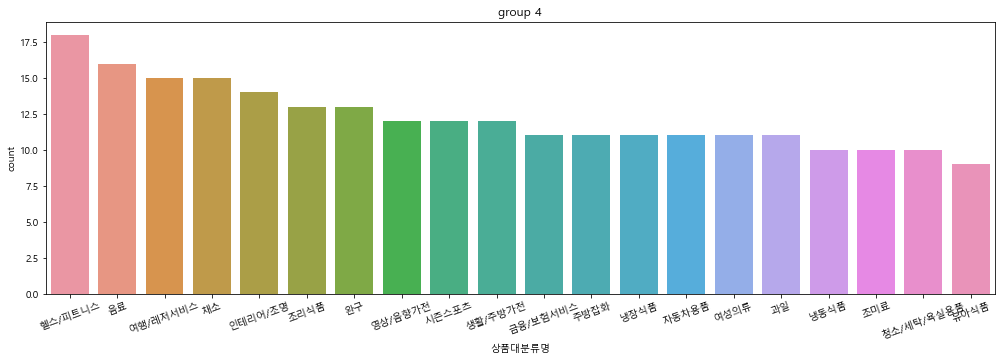

In [204]:
plt.figure(figsize=(17,5))
a=sns.countplot(x='상품대분류명', data=cluster_4, order = cluster_4['상품대분류명'].value_counts().index[:20])
a.set_xticklabels(a.get_xticklabels(),rotation = 20)
a.set(title = "group 4")
plt.show()

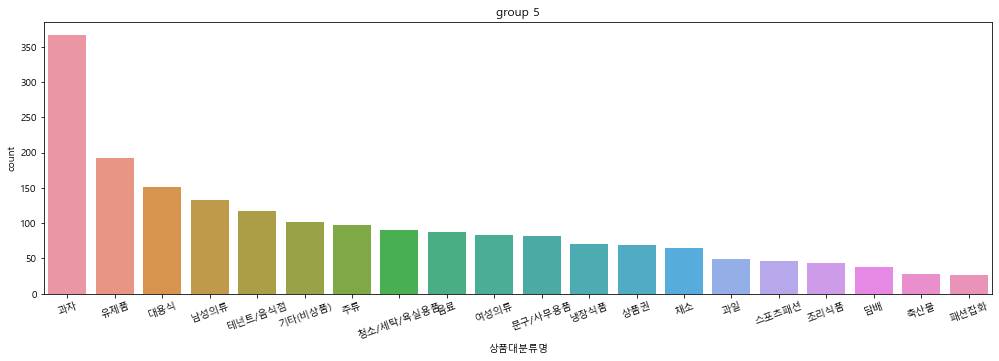

In [205]:
plt.figure(figsize=(17,5))
a=sns.countplot(x='상품대분류명', data=cluster_5, order = cluster_5['상품대분류명'].value_counts().index[:20])
a.set_xticklabels(a.get_xticklabels(),rotation = 20)
a.set(title = "group 5")
plt.show()

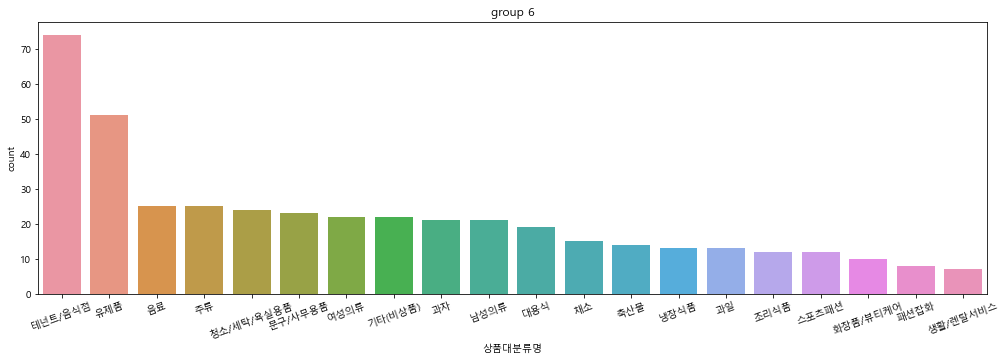

In [206]:
plt.figure(figsize=(17,5))
a=sns.countplot(x='상품대분류명', data=cluster_6, order = cluster_6['상품대분류명'].value_counts().index[:20])
a.set_xticklabels(a.get_xticklabels(),rotation = 20)
a.set(title = "group 6")
plt.show()

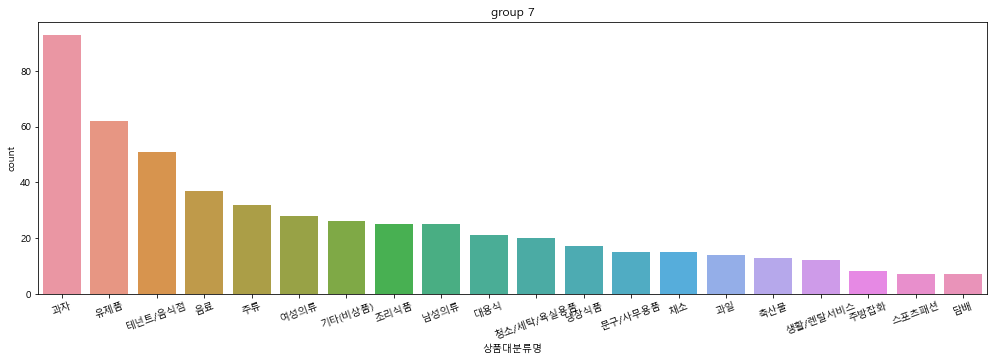

In [207]:
plt.figure(figsize=(17,5))
a=sns.countplot(x='상품대분류명', data=cluster_7, order = cluster_7['상품대분류명'].value_counts().index[:20])
a.set_xticklabels(a.get_xticklabels(),rotation = 20)
a.set(title = "group 7")
plt.show()

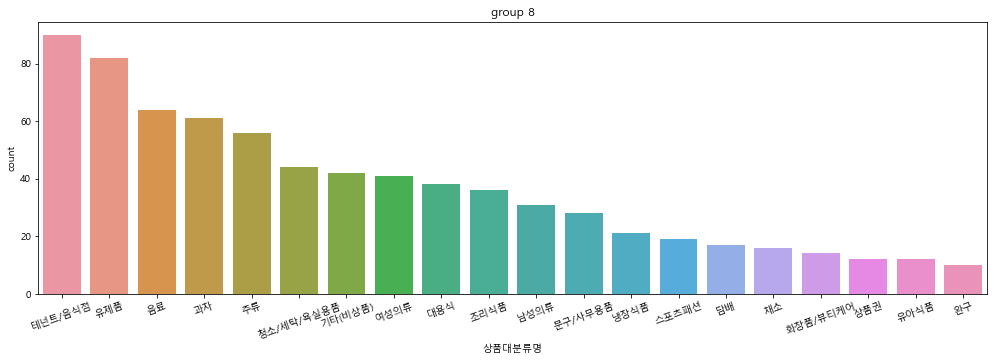

In [208]:
plt.figure(figsize=(17,5))
a=sns.countplot(x='상품대분류명', data=cluster_8, order = cluster_8['상품대분류명'].value_counts().index[:20])
a.set_xticklabels(a.get_xticklabels(),rotation = 20)
a.set(title = "group 8")
plt.show()

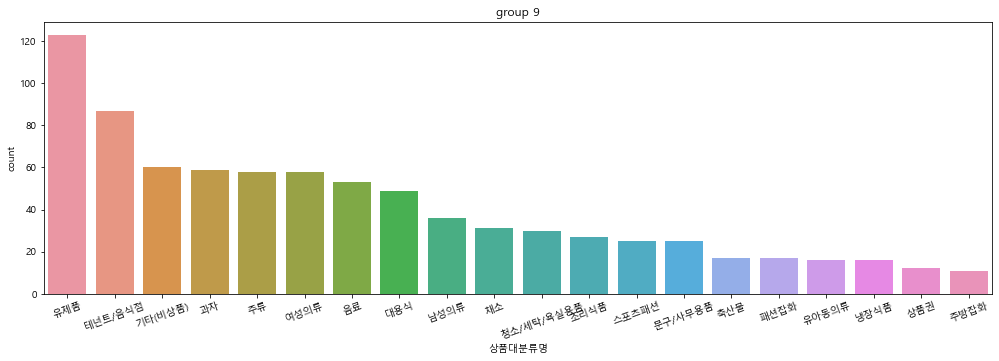

In [209]:
plt.figure(figsize=(17,5))
a=sns.countplot(x='상품대분류명', data=cluster_9, order = cluster_9['상품대분류명'].value_counts().index[:20])
a.set_xticklabels(a.get_xticklabels(),rotation = 20)
a.set(title = "group 9")
plt.show()

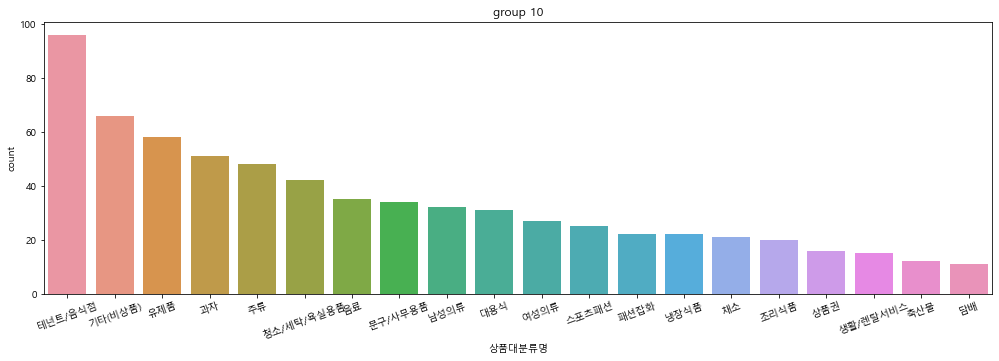

In [210]:
plt.figure(figsize=(17,5))
a=sns.countplot(x='상품대분류명', data=cluster_10, order = cluster_10['상품대분류명'].value_counts().index[:20])
a.set_xticklabels(a.get_xticklabels(),rotation = 20)
a.set(title = "group 10")
plt.show()

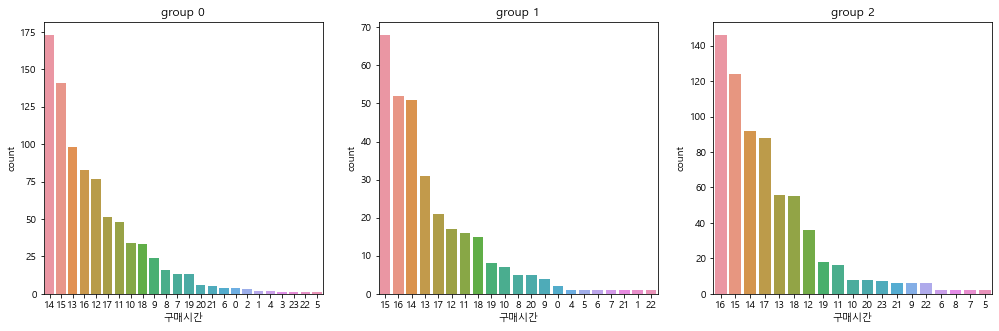

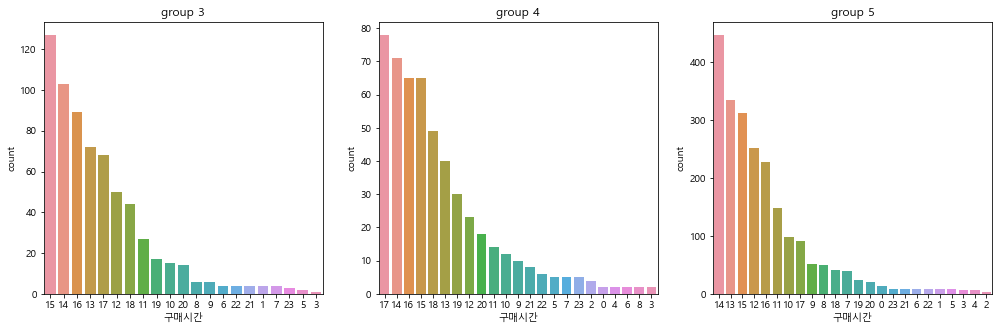

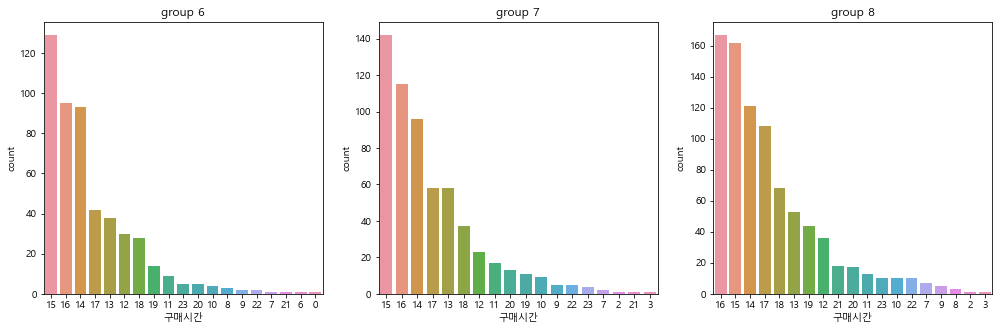

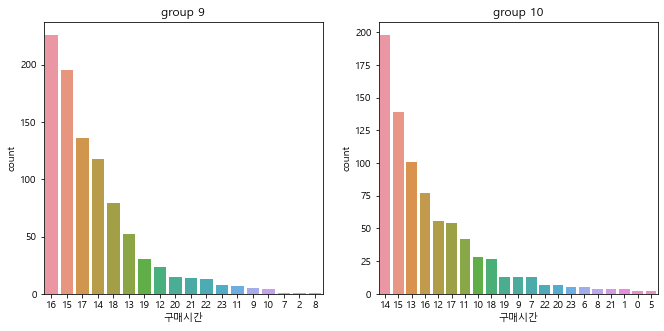

In [211]:
# 구매시간
plt.figure(figsize=(17,5))
plt.subplot(131)
a=sns.countplot(x='구매시간', data=cluster_0, order = cluster_0['구매시간'].value_counts().index)
a.set(title = "group 0")
plt.subplot(132)
b=sns.countplot(x='구매시간', data=cluster_1, order = cluster_1['구매시간'].value_counts().index)
b.set(title = "group 1")
plt.subplot(133)
c=sns.countplot(x='구매시간', data=cluster_2, order = cluster_2['구매시간'].value_counts().index)
c.set(title = "group 2")
plt.show()

plt.figure(figsize=(17,5))
plt.subplot(131)
a=sns.countplot(x='구매시간', data=cluster_3, order = cluster_3['구매시간'].value_counts().index)
a.set(title = "group 3")
plt.subplot(132)
b=sns.countplot(x='구매시간', data=cluster_4, order = cluster_4['구매시간'].value_counts().index)
b.set(title = "group 4")
plt.subplot(133)
c=sns.countplot(x='구매시간', data=cluster_5, order = cluster_5['구매시간'].value_counts().index)
c.set(title = "group 5")
plt.show()

plt.figure(figsize=(17,5))
plt.subplot(131)
a=sns.countplot(x='구매시간', data=cluster_6, order = cluster_6['구매시간'].value_counts().index)
a.set(title = "group 6")
plt.subplot(132)
b=sns.countplot(x='구매시간', data=cluster_7, order = cluster_7['구매시간'].value_counts().index)
b.set(title = "group 7")
plt.subplot(133)
c=sns.countplot(x='구매시간', data=cluster_8, order = cluster_8['구매시간'].value_counts().index)
c.set(title = "group 8")
plt.show()

plt.figure(figsize=(17,5))
plt.subplot(131)
a=sns.countplot(x='구매시간', data=cluster_9, order = cluster_9['구매시간'].value_counts().index)
a.set(title = "group 9")
plt.subplot(132)
b=sns.countplot(x='구매시간', data=cluster_10, order = cluster_10['구매시간'].value_counts().index)
b.set(title = "group 10")
plt.show()

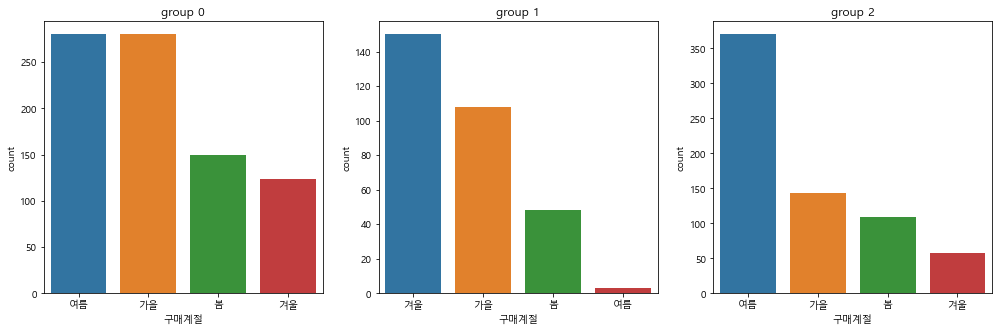

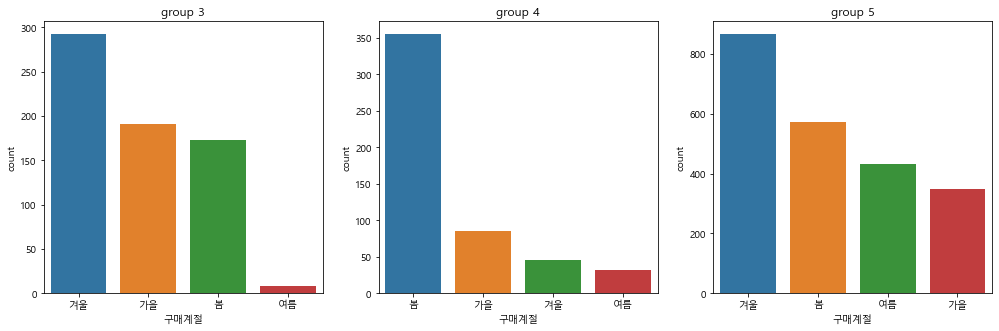

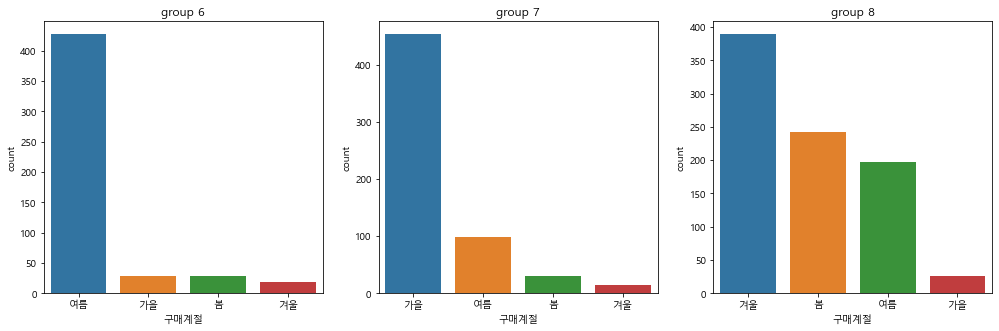

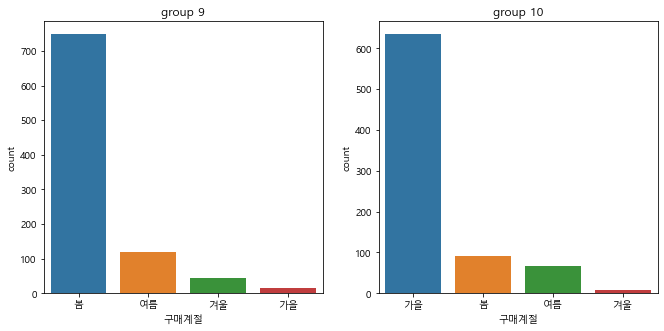

In [212]:
# 구매계절
plt.figure(figsize=(17,5))
plt.subplot(131)
a=sns.countplot(x='구매계절', data=cluster_0, order = cluster_0['구매계절'].value_counts().index)
a.set(title = "group 0")
plt.subplot(132)
b=sns.countplot(x='구매계절', data=cluster_1, order = cluster_1['구매계절'].value_counts().index)
b.set(title = "group 1")
plt.subplot(133)
c=sns.countplot(x='구매계절', data=cluster_2, order = cluster_2['구매계절'].value_counts().index)
c.set(title = "group 2")
plt.show()

plt.figure(figsize=(17,5))
plt.subplot(131)
a=sns.countplot(x='구매계절', data=cluster_3, order = cluster_3['구매계절'].value_counts().index)
a.set(title = "group 3")
plt.subplot(132)
b=sns.countplot(x='구매계절', data=cluster_4, order = cluster_4['구매계절'].value_counts().index)
b.set(title = "group 4")
plt.subplot(133)
c=sns.countplot(x='구매계절', data=cluster_5, order = cluster_5['구매계절'].value_counts().index)
c.set(title = "group 5")
plt.show()

plt.figure(figsize=(17,5))
plt.subplot(131)
a=sns.countplot(x='구매계절', data=cluster_6, order = cluster_6['구매계절'].value_counts().index)
a.set(title = "group 6")
plt.subplot(132)
b=sns.countplot(x='구매계절', data=cluster_7, order = cluster_7['구매계절'].value_counts().index)
b.set(title = "group 7")
plt.subplot(133)
c=sns.countplot(x='구매계절', data=cluster_8, order = cluster_8['구매계절'].value_counts().index)
c.set(title = "group 8")
plt.show()

plt.figure(figsize=(17,5))
plt.subplot(131)
a=sns.countplot(x='구매계절', data=cluster_9, order = cluster_9['구매계절'].value_counts().index)
a.set(title = "group 9")
plt.subplot(132)
b=sns.countplot(x='구매계절', data=cluster_10, order = cluster_10['구매계절'].value_counts().index)
b.set(title = "group 10")
plt.show()